##Imports and Installations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import chi2_contingency

## About Dataset

The data analysis done within this notebook was carried out on a video game sales dataset that contains sales data on video games ranging from 2018 to 2023.

Columns:
- img: the uri for the box art.
- title: title of the game.
- console: console the game was released for.
- genre: genre of the game.
- publisher: publisher of the game.
- developer: developer of the game.
- critic_score: metacritic score (out of 10).
- total_sales: global sales of copies in millions.
- na_sales: North American sales of copies in millions.
- jp_sales: Japanese sales of copies in millions.
- pal_sales: Europe/Africa sales in millions.
- other_sales: other sales of copies in millions.
- release_date: date the game released.
- last_update: date the data was last updated.


##Data Exploration

Loading dataset into data frame

In [ ]:
df = pd.read_csv('/content/vgchartz-2024.csv')

Data Exploration

Showing the first five rows in the dataset

In [ ]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


Inspecting non-null count

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


Inspecting statistics for numerical columns.


*Note: This only provides some relevant statistics on measures of dispersion and central tendency. Other metrics are explored further.*

In [ ]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


Calculating the mode for each numerical column

In [ ]:
critic_score_mode_value = df['critic_score'].mode().iloc[0]
total_sales_mode_value = df['total_sales'].mode().iloc[0]
na_sales_mode_value = df['na_sales'].mode().iloc[0]
jp_sales_mode_value = df['jp_sales'].mode().iloc[0]
pal_sales_mode_value = df['pal_sales'].mode().iloc[0]
other_sales_mode_value = df['other_sales'].mode().iloc[0]
print("Overall mode value for critic score:", critic_score_mode_value)
print("Overall mode value for total sales:", total_sales_mode_value)
print("Overall mode value for North America sales:", na_sales_mode_value)
print("Overall mode value for Japanese sales:", jp_sales_mode_value)
print("Overall mode value for Europe/Africa sales:", pal_sales_mode_value)
print("Overall mode value for other:", other_sales_mode_value)


Overall mode value for critic score: 8.0
Overall mode value for total sales: 0.01
Overall mode value for North America sales: 0.04
Overall mode value for Japanese sales: 0.01
Overall mode value for Europe/Africa sales: 0.0
Overall mode value for other: 0.0


Calculating the range for each numerical column

In [ ]:
critic_score_range_value = df['critic_score'].max() - df['critic_score'].min()
total_sales_range_value = df['total_sales'].max() - df['total_sales'].min()
na_sales_range_value = df['na_sales'].max() - df['na_sales'].min()
jp_sales_range_value = df['jp_sales'].max() - df['jp_sales'].min()
pal_sales_range_value = df['pal_sales'].max() - df['pal_sales'].min()
other_sales_range_value = df['other_sales'].max() - df['other_sales'].min()
print("Overall range value for critic score:", critic_score_range_value)
print("Overall range value for total sales:", total_sales_range_value)
print("Overall range value for North America sales:", na_sales_range_value)
print("Overall range value for Japanese sales:", jp_sales_range_value)
print("Overall range value for Europe/Africa sales:", pal_sales_range_value)
print("Overall range value for other:", other_sales_range_value)


Overall range value for critic score: 9.0
Overall range value for total sales: 20.32
Overall range value for North America sales: 9.76
Overall range value for Japanese sales: 2.13
Overall range value for Europe/Africa sales: 9.85
Overall range value for other: 3.12


variance

In [ ]:
critic_score_variance_value = df['critic_score'].var()
total_sales_variance_value = df['total_sales'].var()
na_sales_variance_value = df['na_sales'].var()
jp_sales_variance_value = df['jp_sales'].var()
pal_sales_variance_value = df['pal_sales'].var()
other_sales_variance_value = df['other_sales'].var()
print("Overall variance value for critic score:", critic_score_variance_value)
print("Overall variance value for total sales:", total_sales_variance_value)
print("Overall variance value for North America sales:", na_sales_variance_value)
print("Overall variance value for Japanese sales:", jp_sales_variance_value)
print("Overall variance value for Europe/Africa sales:", pal_sales_variance_value)
print("Overall variance value for other:", other_sales_variance_value)


Overall variance value for critic score: 2.1230402734252474
Overall variance value for total sales: 0.6519952011934356
Overall variance value for North America sales: 0.24481377580414443
Overall variance value for Japanese sales: 0.028497280897410816
Overall variance value for Europe/Africa sales: 0.15417608406815303
Overall variance value for other: 0.01603857519117969


Smaller variance values suggest that the data points within that particular column are closer to the mean. Hence there is less spread/dispersion of the values, as seen with total_sales,na_sales,jp_sales,pal_sales and other_sales. critic_score has a larger spread compared to the other columns.

Distribution of values and skewness

- A positive skew value indicates the distribution is right skewed.
- A negative skew value indicates the distribution is left skewed.

In [ ]:
skew = df.skew()
print('Skewness of numerical values:\n',skew)

Skewness of numerical values:
 critic_score   -0.910637
total_sales     8.775333
na_sales        6.898373
jp_sales        4.490406
pal_sales       9.586910
other_sales     9.794550
dtype: float64


<ipython-input-10-f9d041c4a407>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = df.skew()


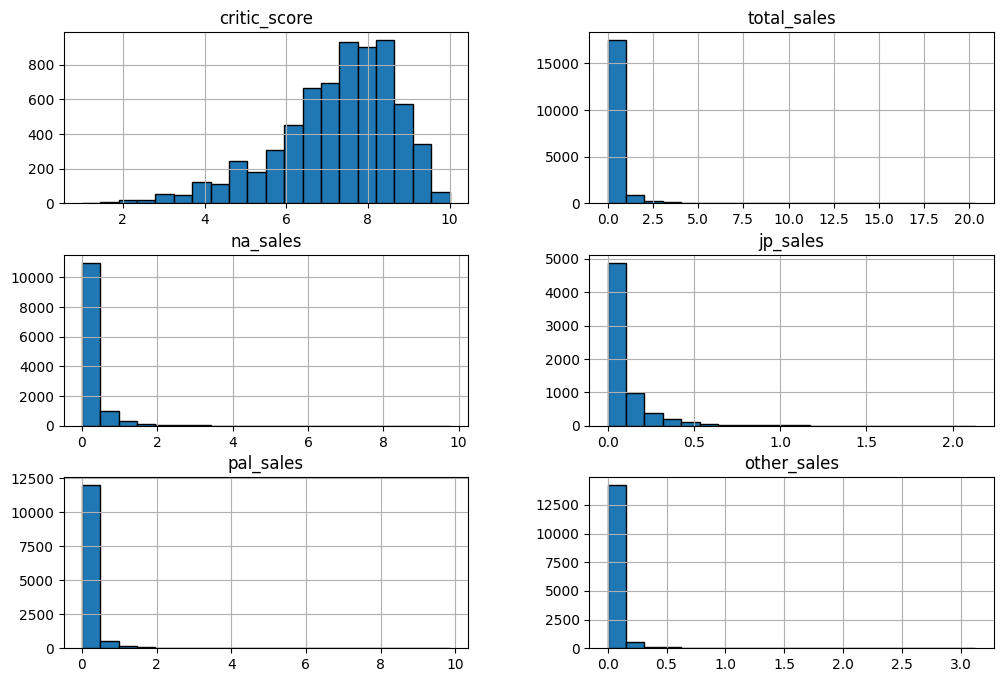

In [ ]:
df.hist(bins=20, figsize=(12, 8), edgecolor='k')#generating a histogram for each numerical column
plt.show()


The histogram subplots above visualizes the skewness of the respective columns.
- critic_score: has a longer tail on the left-hand side of the graph and has a steeper slope from the left-hand side, indicating the distribution is left skewed.
- total_sales,na_sales,jp_sales,pal_sales and other_sales: has a longer tail on the right-hand side and has a steeper slope from the right-hand side, indicating the distributions are right skewed.

Investigating Kurtosis

- A high kurtosis indicates the distribution has a sharper peak, therefore leptokurtic.
- A lower kurtosis indicates the distribution has a flatter peak, therefore platykurtic.
- A kurtosis close to zero indicates a mesokurtic distribution.

In [ ]:
kurtosis = df.kurtosis()
print('Kurtosis of numerical values:\n',kurtosis)

Kurtosis of numerical values:
 critic_score      0.828948
total_sales     125.552452
na_sales         78.628580
jp_sales         30.528417
pal_sales       147.204842
other_sales     144.484527
dtype: float64


<ipython-input-12-c39db1dfa0b9>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()


The values provided indicates that total_sales,na_sales,jp_sales,pal_sales and other_sales possess a more leptokurtic distribution since they have relatively high kurtosis values while it suggests that critic_score posesses a more mesokurtic distribution since its kurtosis value is closer to zero.

Correlation analysis

- Values closer to 1 indicate a positive correlation.
- Values closer to -1 indicate a negative correlation.
- Values closer to 0 indicate non-linear or weak correlation.

<ipython-input-13-bd0af734a114>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_corr = df.corr() #calculating coefficient matrix


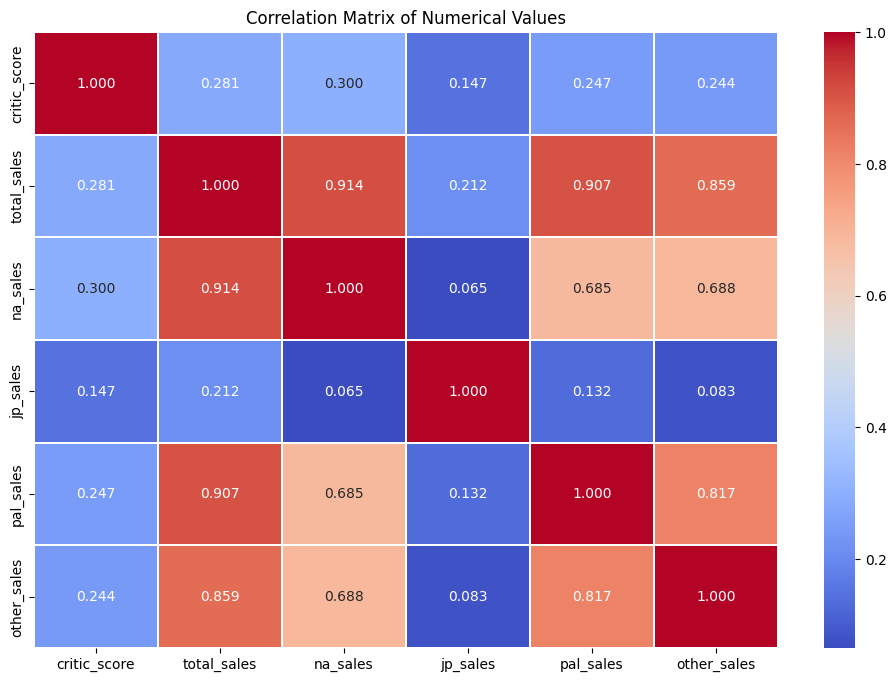

In [ ]:
num_corr = df.corr() #calculating coefficient matrix for numerical values

plt.figure(figsize=(12, 8)) #setting figure size
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.3) #generating heatmap with correlation coefficient values
plt.title('Correlation Matrix of Numerical Values')
plt.show()


Scatter Plots

- Points trending upwards from from left to right indicates positive correlation.
- Points trending downwards from left to right indicates negative correlation.
- No clear points trajectory/pattern indicates no correlation.

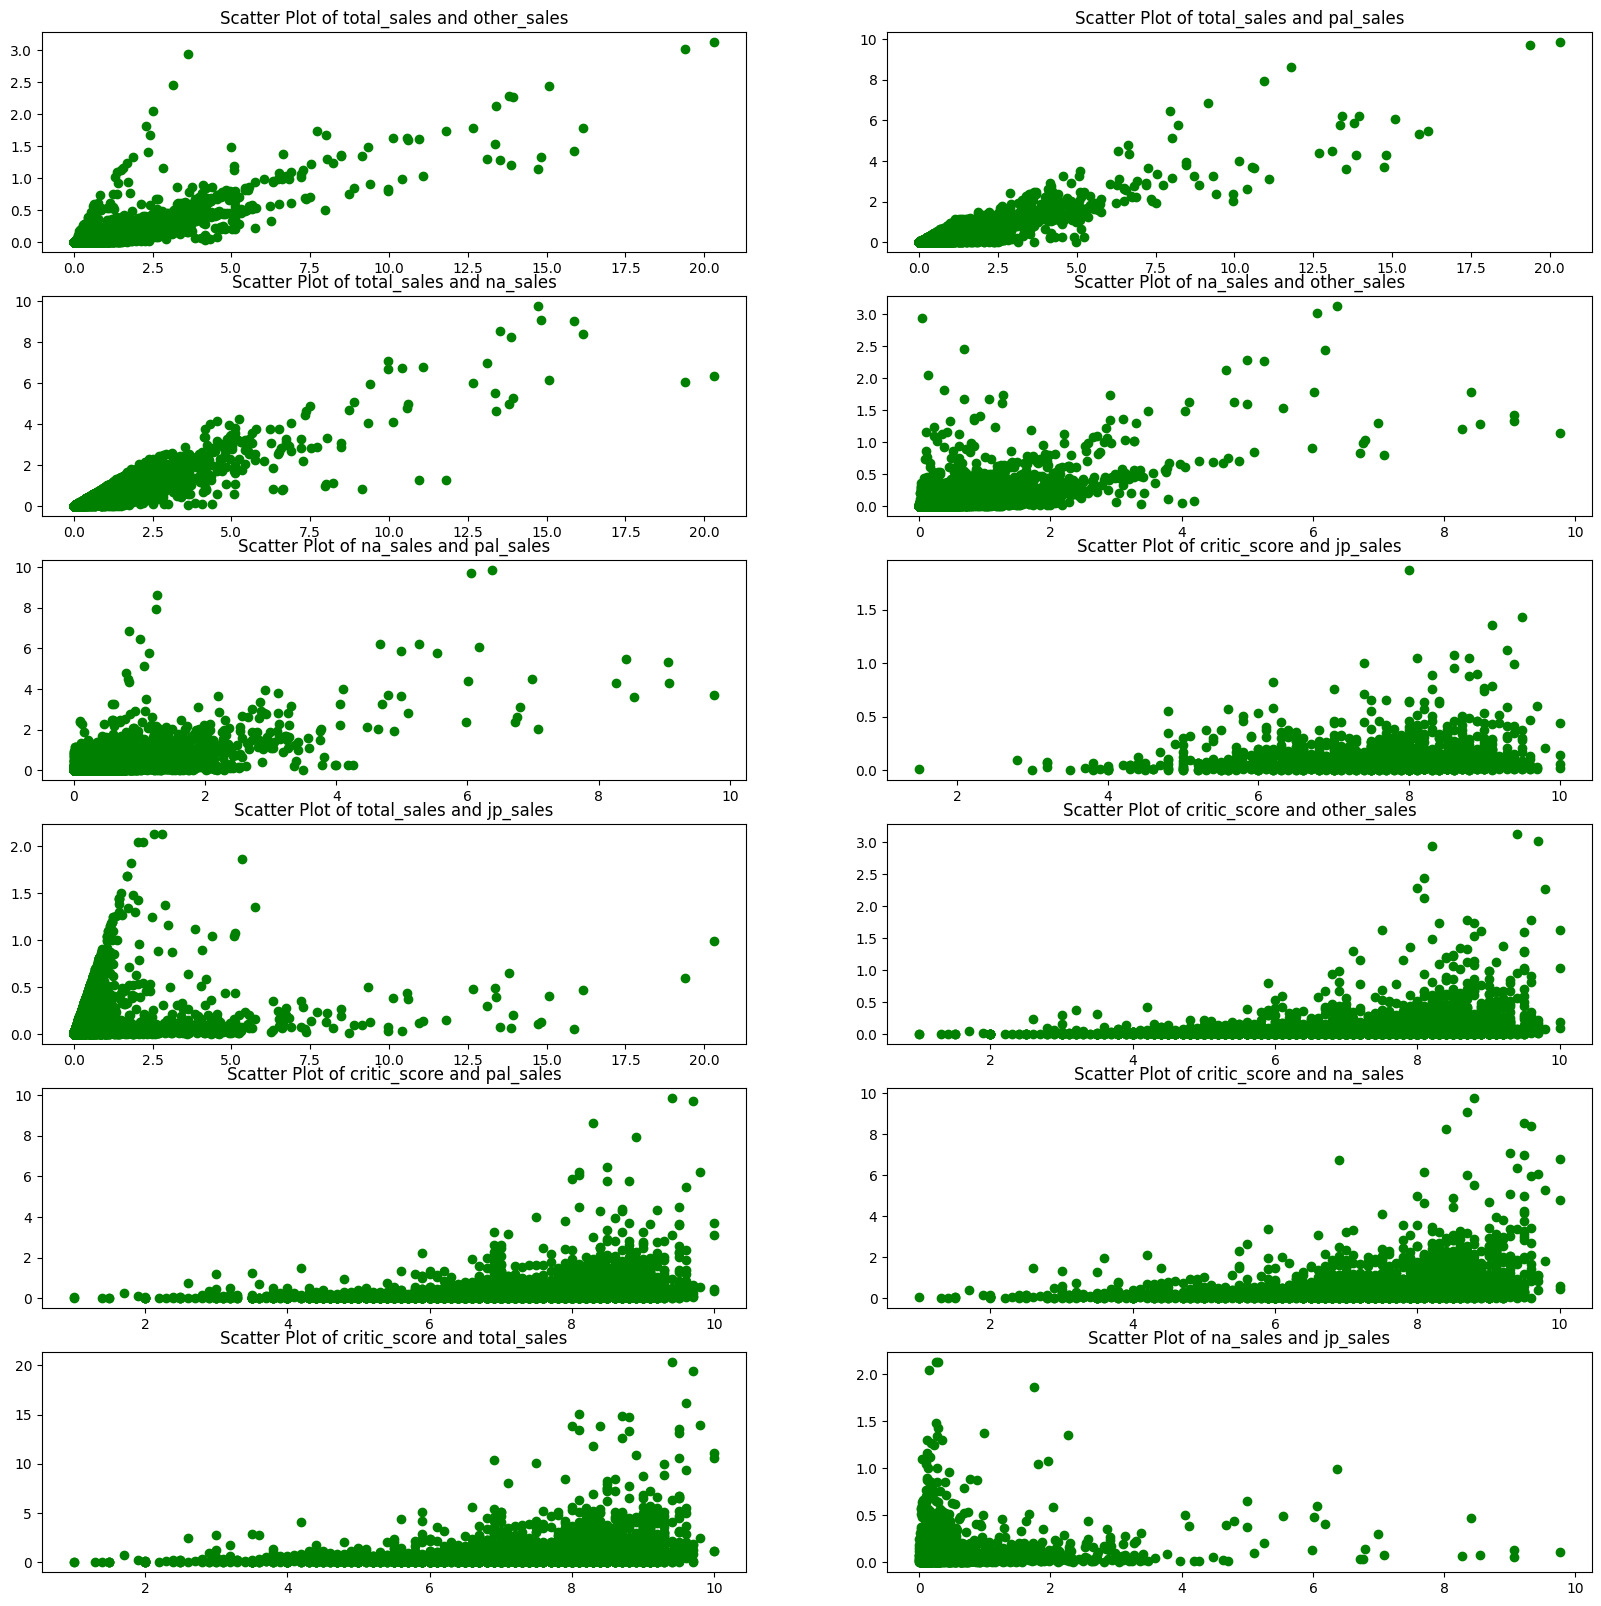

In [ ]:
#establishing figure size, rows and columns
figure,axes = plt.subplots(nrows=6,ncols=2,figsize=(20,20))

#plotting scatter plot in respecive positions
axes[0,0].scatter(df['total_sales'],df['other_sales'],marker='o',color='green')
axes[0,0].set_title('Scatter Plot of total_sales and other_sales')

axes[0,1].scatter(df['total_sales'],df['pal_sales'],marker='o',color='green')
axes[0,1].set_title('Scatter Plot of total_sales and pal_sales')

axes[1,0].scatter(df['total_sales'],df['na_sales'],marker='o',color='green')
axes[1,0].set_title('Scatter Plot of total_sales and na_sales')

axes[1,1].scatter(df['na_sales'],df['other_sales'],marker='o',color='green')
axes[1,1].set_title('Scatter Plot of na_sales and other_sales')

axes[2,0].scatter(df['na_sales'],df['pal_sales'],marker='o',color='green')
axes[2,0].set_title('Scatter Plot of na_sales and pal_sales')

axes[2,1].scatter(df['critic_score'],df['jp_sales'],marker='o',color='green')
axes[2,1].set_title('Scatter Plot of critic_score and jp_sales')

axes[3,0].scatter(df['total_sales'],df['jp_sales'],marker='o',color='green')
axes[3,0].set_title('Scatter Plot of total_sales and jp_sales')

axes[3,1].scatter(df['critic_score'],df['other_sales'],marker='o',color='green')
axes[3,1].set_title('Scatter Plot of critic_score and other_sales')

axes[4,0].scatter(df['critic_score'],df['pal_sales'],marker='o',color='green')
axes[4,0].set_title('Scatter Plot of critic_score and pal_sales')

axes[4,1].scatter(df['critic_score'],df['na_sales'],marker='o',color='green')
axes[4,1].set_title('Scatter Plot of critic_score and na_sales')

axes[5,0].scatter(df['critic_score'],df['total_sales'],marker='o',color='green')
axes[5,0].set_title('Scatter Plot of critic_score and total_sales')

axes[5,1].scatter(df['na_sales'],df['jp_sales'],marker='o',color='green')
axes[5,1].set_title('Scatter Plot of na_sales and jp_sales')

plt.show()

The scatter plots above suggest that total_sales has a stronger correlation with other_sales,pal_sales,jp_sales and na_sales since there is a clear trajectory pattern from the bottom left to the upper right-hand corners of the plots. While the other plots suggest little to no correlation, given that they do not have a clear trajectory pattern.

Distribution of categorical variables

Creating frequency tables for categorical columns.

In [ ]:
console_frequency = df['console'].value_counts()
print('Frequency table for console:\n',console_frequency)

Frequency table for console:
 PC      12617
PS2      3565
DS       3288
PS4      2878
PS       2707
        ...  
TG16        3
FDS         1
C128        1
Aco         1
BBCM        1
Name: console, Length: 81, dtype: int64


In [ ]:
genre_frequency = df['genre'].value_counts()
print('Frequency table for genre:\n',genre_frequency)

Frequency table for genre:
 Misc                9304
Action              8557
Adventure           6260
Role-Playing        5721
Sports              5586
Shooter             5410
Platform            4001
Strategy            3685
Puzzle              3521
Racing              3425
Simulation          3158
Fighting            2367
Action-Adventure    1877
Visual Novel         493
Music                297
Party                151
MMO                  115
Education             35
Board Game            33
Sandbox               20
Name: genre, dtype: int64


In [ ]:
publisher_frequency = df['publisher'].value_counts()
print('Frequency table for publisher:\n',publisher_frequency)

Frequency table for publisher:
 Unknown               8842
Sega                  2207
Ubisoft               1663
Electronic Arts       1619
Activision            1582
                      ... 
Cancer Research UK       1
XperimentalZ Games       1
Nano Games               1
Cooking Mama Ltd.        1
PLAYDIUS                 1
Name: publisher, Length: 3383, dtype: int64


In [ ]:
developer_frequency = df['developer'].value_counts()
print('Frequency table for developer:\n',developer_frequency)

Frequency table for developer:
 Unknown             4435
Konami               976
Sega                 915
Capcom               870
Namco                489
                    ... 
Solutions 2 Go         1
Whampashimash          1
Redwind Software       1
Iron Square            1
Paretto                1
Name: developer, Length: 8862, dtype: int64


In [ ]:
title_frequency = df['title'].value_counts()
print('Frequency table for title:\n',title_frequency)

Frequency table for title:
 Plants vs. Zombies                  17
Pac-Man                             16
Monopoly                            15
Doom                                14
Double Dragon                       14
                                    ..
Bakegyamon: Ayakashi Fighting        1
Avatar Showdown                      1
Avatar Fighter Online                1
Avatar Fighter                       1
Yurukill: The Calumniation Games     1
Name: title, Length: 39798, dtype: int64


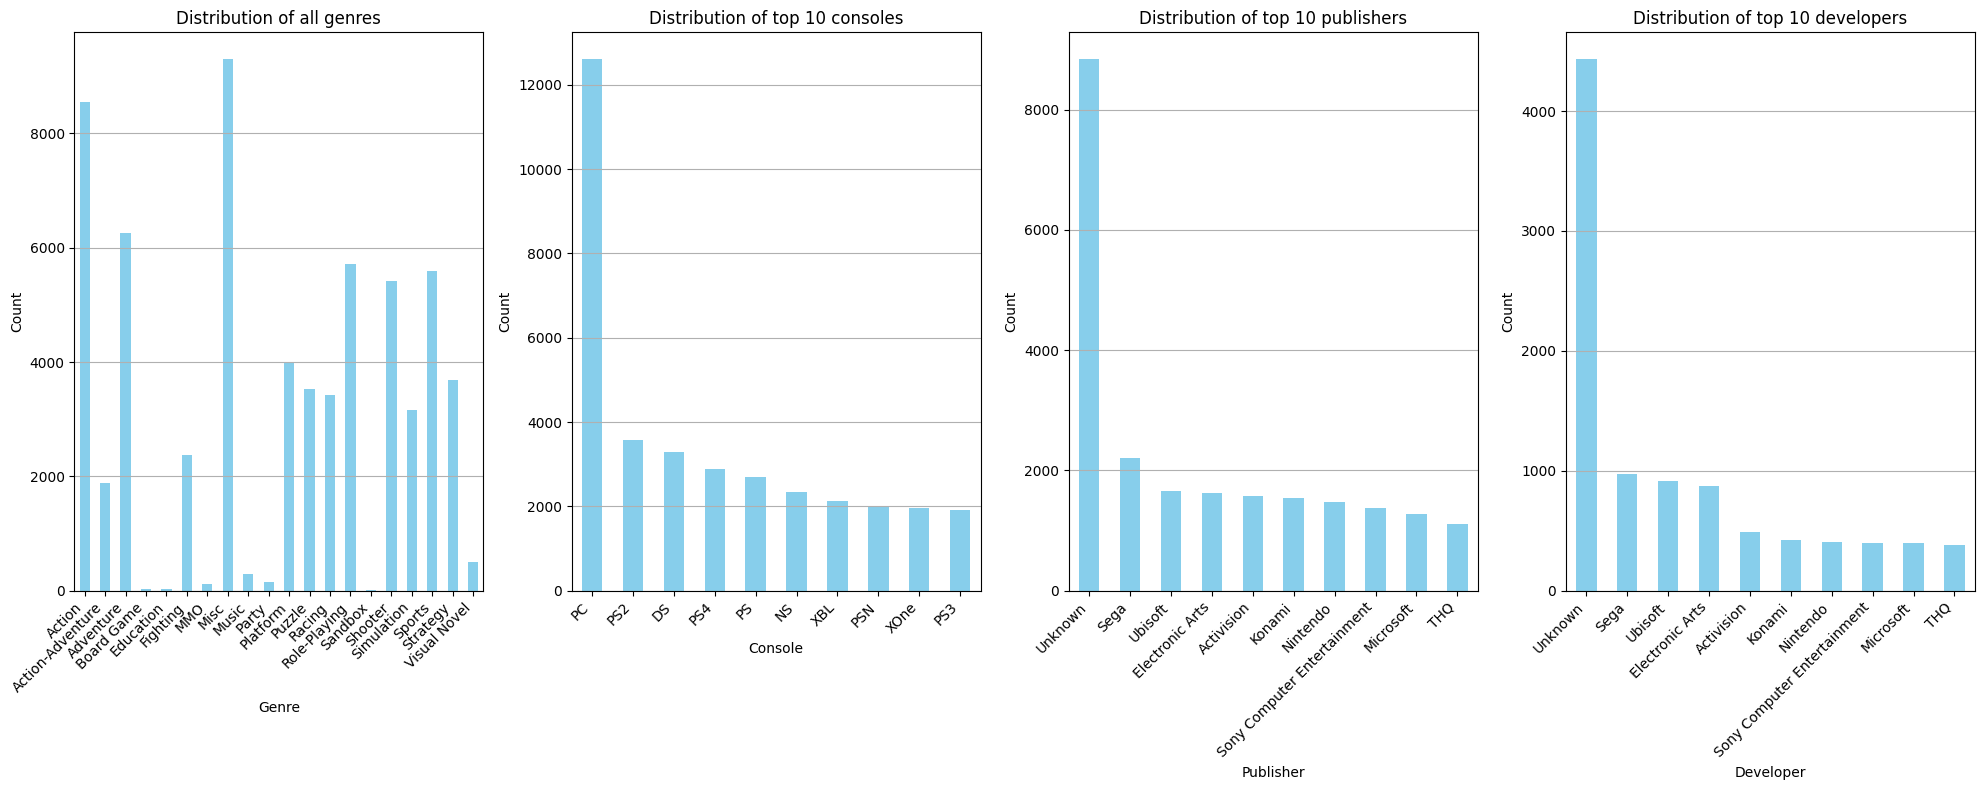

In [ ]:
#establishing figure size, rows and columns
figure,axes = plt.subplots(nrows=1,ncols=4, figsize=(20,8))

df['genre'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')#sorting frequency table then plotting
axes[0].set_title('Distribution of all genres')#setting title of plot
axes[0].set_xlabel('Genre')#labelling x-axis
axes[0].set_ylabel('Count')#labelling y-axis
axes[0].grid(axis='y')#making horizontal grid visible
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')#orienting the x-axis labels 45 degrees slanted

top_consoles = df['console'].value_counts().nlargest(10)#extracting top 10 consoles from frequency table
top_consoles.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Distribution of top 10 consoles')
axes[1].set_xlabel('Console')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

top_publishers = df['publisher'].value_counts().nlargest(10)#extracting top 10 publishers from frequency table
top_publishers.plot(kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of top 10 publishers')
axes[2].set_xlabel('Publisher')
axes[2].set_ylabel('Count')
axes[2].grid(axis='y')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

top_developers = df['developer'].value_counts().nlargest(10)#extracting top 10 developers from frequency table
top_developers.plot(kind='bar', ax=axes[3], color='skyblue')
axes[3].set_title('Distribution of top 10 developers')
axes[3].set_xlabel('Developer')
axes[3].set_ylabel('Count')
axes[3].grid(axis='y')
axes[3].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

The top 10 consoles, publishers and developers were chosen to allow for readibility and presentation of the visualization.

##Data Preprocessing

Utilizing label encoding for categorical columns

*Note: label encoding cells were ran after chi-square analysis so as not to interfere with the initial assumption that the categorical values are independent. Which encoding affects.*

In [ ]:
label_encoder = LabelEncoder()

#encoding console column
df['console'] = label_encoder.fit_transform(df['console'])
print(df['console'])

0        54
1        55
2        53
3        73
4        55
         ..
64011    49
64012    55
64013    45
64014    45
64015    55
Name: console, Length: 64016, dtype: int64


In [ ]:
#encoding genre column
df['genre'] = label_encoder.fit_transform(df['genre'])
print(df['genre'])

0         0
1         0
2         0
3         0
4        15
         ..
64011    19
64012    19
64013    19
64014    19
64015    19
Name: genre, Length: 64016, dtype: int64


In [ ]:
#encoding publisher column
df['publisher'] = label_encoder.fit_transform(df['publisher'])
print(df['publisher'])

0        2445
1        2445
2        2445
3        2445
4         101
         ... 
64011     131
64012    2023
64013    2023
64014    1349
64015    3062
Name: publisher, Length: 64016, dtype: int64


In [ ]:
#encoding developer column
df['developer'] = label_encoder.fit_transform(df['developer'])
print(df['developer'])

0        6366
1        6366
2        6366
3        6366
4        7828
         ... 
64011     518
64012    5297
64013    5297
64014    5505
64015    2853
Name: developer, Length: 64016, dtype: int64


In [ ]:
#encoding title column
df['title'] = label_encoder.fit_transform(df['title'])
print(df['title'])

0        13724
1        13724
2        13736
3        13724
4         5271
         ...  
64011    38814
64012    39070
64013    39070
64014    39258
64015    39262
Name: title, Length: 64016, dtype: int64


Dropping irrelevant columns

In [ ]:
#last_update,release_date and img columns were deemed not important for further analysis
df = df.drop('last_update', axis=1)
df = df.drop('release_date', axis=1)
df = df.drop('img', axis=1)

In [ ]:
#checking to ensure the columns above were dropped
df.head(0)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales


In [ ]:
#checking for null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.4+ MB


Filling null values in numerical columns with their corresponding medians

In [ ]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())
df['total_sales'] = df['total_sales'].fillna(df['total_sales'].median())
df['na_sales'] = df['na_sales'].fillna(df['na_sales'].median())
df['jp_sales'] = df['jp_sales'].fillna(df['jp_sales'].median())
df['pal_sales'] = df['pal_sales'].fillna(df['pal_sales'].median())
df['other_sales'] = df['other_sales'].fillna(df['other_sales'].median())

In [ ]:
#checking to ensure previous null columns are now filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  64016 non-null  float64
 6   total_sales   64016 non-null  float64
 7   na_sales      64016 non-null  float64
 8   jp_sales      64016 non-null  float64
 9   pal_sales     64016 non-null  float64
 10  other_sales   64016 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.4+ MB


##Statistical Analysis

Hypothesis testing

**Independent t-tests**

*Note: Independent t-tests were specifically conducted on parameters that had little or no correlation based on data exploration done above.*

Comparing critic_score between high and low total_sales

 - Null Hypothesis: There is no significant difference between mean critic scores and mean high and low total sales.
 - Alternative Hypothesis: There is a significant difference between mean critic scores and mean high and low total sales.

In [ ]:
alpha = 0.05 # setting significance level

In [ ]:
t_stat,p_val = stats.ttest_ind(df['critic_score'],df['total_sales']) # calculating the test statistic and p-value
# comparing p-value and significance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference the between mean critic scores and mean high and low total sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean critic scores and mean high and low total sales.')

Reject the null hypothesis. There is a significant difference between mean critic scores and mean high and low total sales.


Comparing critic_score and North American sales

 - Null Hypothesis: There is no significant difference between mean critic scores and mean North American sales.
 - Alternative Hypothesis: There is a significant difference between mean critic scores and mean North American sales.


In [ ]:
t_stat,p_val = stats.ttest_ind(df['critic_score'],df['na_sales']) # calculating the test statistic and p-value
# comparing p-value and significance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean critic scores and mean North American sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean critic scores and mean North American sales.')

Reject the null hypothesis. There is a significant difference between mean critic scores and mean North American sales.


Comparing critic_score and Japanese sales

 - Null Hypothesis: There is no significant difference between mean critic scores and mean Japanese sales.
 - Alternative Hypothesis: There is a significant difference between mean critic scores and mean Japanese sales.

In [ ]:
t_stat,p_val = stats.ttest_ind(df['critic_score'],df['jp_sales']) # calculating the test statistic and p-value
# comparing p-value and significance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean critic scores and mean Japanese sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean critic scores and mean Japanese sales.')

Reject the null hypothesis. There is a significant difference between mean critic scores and mean Japanese sales.


Comparing critic_score and Europe/Africa sales

 - Null Hypothesis: There is no significant difference between mean critic scores and mean Europe/Africa sales.
 - Alternative Hypothesis: There is a significant difference between mean critic scores and mean Europe/Africa sales.

In [ ]:
t_stat,p_val = stats.ttest_ind(df['critic_score'],df['pal_sales']) # calculating the test statistic and p-value
# comparing p-value and significance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean critic scores and mean Europe/Africa sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean critic scores and mean Europe/Africa sales.')

Reject the null hypothesis. There is a significant difference between mean critic scores and mean Europe/Africa sales.


Comparing critic_score and other sales

 - Null Hypothesis: There is no significant difference between mean critic scores and mean Other sales.
 - Alternative Hypothesis: There is a significant difference between mean critic scores and mean Other sales.

In [ ]:
t_stat,p_val = stats.ttest_ind(df['critic_score'],df['other_sales']) # calculating the test statistic and p-value
# comparing p-value andsignificance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean critic scores and mean Other sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean critic scores and mean Other sales.')

Reject the null hypothesis. There is a significant difference between mean critic scores and mean Other sales.


**Paired t-tests**

*Note: Paired t-tests were specifically done on parameters that have strong correlations based on data exploration done above.*

Comparing total sales and other sales

 - Null Hypothesis: There is no significant difference between mean total sales and mean Other sales.
 - Alternative Hypothesis: There is a significant difference between mean total sales and mean Other sales.

In [ ]:
t_stat,p_val = stats.ttest_rel(df['total_sales'],df['other_sales']) # calculating the test statistic and p-value
# comparing p-value andsignificance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean total sales and mean Other sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean total sales and mean Other sales.')

Reject the null hypothesis. There is a significant difference between mean total sales and mean Other sales.


Comparing total sales and North American sales

 - Null Hypothesis: There is no significant difference between mean total sales and mean North America sales.
 - Alternative Hypothesis: There is a significant difference between mean total sales and mean North America sales.

In [ ]:
t_stat,p_val = stats.ttest_rel(df['total_sales'],df['na_sales']) # calculating the test statistic and p-value
# comparing p-value andsignificance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean total sales and mean North America sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean total sales and mean North America sales.')

Reject the null hypothesis. There is a significant difference between mean total sales and mean North America sales.


Comparing total sales and Japan sales

 - Null Hypothesis: There is no significant difference between mean total sales and mean Japan sales.
 - Alternative Hypothesis: There is a significant difference between mean total sales and mean Japan sales.

In [ ]:
t_stat,p_val = stats.ttest_rel(df['total_sales'],df['jp_sales']) # calculating the test statistic and p-value
# comparing p-value andsignificance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean total sales and mean Japan sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean total sales and mean Japan sales.')

Reject the null hypothesis. There is a significant difference between mean total sales and mean Japan sales.


Comparing total sales and Europe/Africa sales

 - Null Hypothesis: There is no significant difference between mean total sales and mean Europe/Africa sales.
 - Alternative Hypothesis: There is a significant difference between mean total sales and mean Europe/Africa sales.

In [ ]:
t_stat,p_val = stats.ttest_rel(df['total_sales'],df['pal_sales']) # calculating the test statistic and p-value
# comparing p-value andsignificance level
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant difference between mean total sales and mean Europe/Africa sales.')
else:
  print('Reject the null hypothesis. There is a significant difference between mean total sales and mean Europe/Africa sales.')

Reject the null hypothesis. There is a significant difference between mean total sales and mean Europe/Africa sales.


**Chi-square test for independence**

Testing independence between genre and publisher

- Null Hypothesis: There is no significant association between genre and publisher.
- Alternative Hypothesis: There is a significant association between genre and publisher.

In [ ]:
#generating contingency table
genre_publisher_cont_table = pd.crosstab(df['genre'],df['publisher'])
genre_publisher_cont_table

publisher,100 Gates,10TACLE Studios,10tons,10tons Ltd,11 bit studios,1337 Game Design,13cm,14 Degrees East,17-Bit,1C Company,...,"responDESIGN, Inc.",softhouse-seal,team BitClub,thechineseroom,thesetales,tono / Ctrl+k,tri-Ace,uClick,wooga,yeo
genre,,,,,,,,,,,,,,,,,,,,,
Action,1,1,4,2,6,0,0,0,3,2,...,0,0,0,0,0,0,0,0,0,0
Action-Adventure,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,1
Adventure,0,0,0,0,4,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Board Game,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Education,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fighting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MMO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Misc,0,1,0,18,22,1,0,0,0,10,...,1,1,0,1,3,1,0,0,4,0
Music,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#calculating p-value and chi-square statistic
chi_stat,p_val,_,_ = chi2_contingency(genre_publisher_cont_table)
if p_val > alpha:
  print('Fail to reject null hypothesis. There is no significant association between genre and publisher.')
else:
  print('Reject the null hypothesis. There is a significant association between genre and publisher.')

Reject the null hypothesis. There is a significant association between genre and publisher.


Testing independence between genre and developer

- Null Hypothesis: There is no significant association between genre and developer.
- Alternative Hypothesis: There is a significant association between genre and developer.

In [ ]:
genre_developer_cont_table = pd.crosstab(df['genre'],df['developer'])
chi_stat,p_val,_,_ = chi2_contingency(genre_developer_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between genre and developer. ')
else:
  print('Reject the null hypothesis. There is a significant association between genre and developer.')

Reject the null hypothesis. There is a significant association between genre and developer.


Testing independence between genre and title

- Null Hypothesis: There is no significant association between genre and title.
- Alternative Hypothesis: There is a significant association between genre and title.

In [ ]:
genre_title_cont_table = pd.crosstab(df['genre'],df['title'])
chi_stat,p_val,_,_ = chi2_contingency(genre_title_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between genre and title. ')
else:
  print('Reject the null hypothesis. There is a significant association between genre and title.')

Reject the null hypothesis. There is a significant association between genre and title.


Testing independence between genre and console

- Null Hypothesis: There is no significant association between genre and console.
- Alternative Hypothesis: There is a significant association between genre and console.

In [ ]:
genre_console_cont_table = pd.crosstab(df['genre'],df['console'])
chi_stat,p_val,_,_ = chi2_contingency(genre_console_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between genre and console. ')
else:
  print('Reject the null hypothesis. There is a significant association between genre and console.')

Reject the null hypothesis. There is a significant association between genre and console.


Testing independence between console and title

- Null Hypothesis: There is no significant association between console and title.
- Alternative Hypothesis: There is a significant association between console and title.

In [ ]:
console_title_cont_table = pd.crosstab(df['console'],df['title'])
chi_stat,p_val,_,_ = chi2_contingency(console_title_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between console and title. ')
else:
  print('Reject the null hypothesis. There is a significant association between console and title.')

Fail to reject the null hypothesis. There is no significant association between console and title. 


Testing independence between console and developer

- Null Hypothesis: There is no significant association between console and developer.
- Alternative Hypothesis: There is a significant association between console and developer.

In [ ]:
console_developer_cont_table = pd.crosstab(df['console'],df['developer'])
chi_stat,p_val,_,_ = chi2_contingency(console_developer_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between console and developer. ')
else:
  print('Reject the null hypothesis. There is a significant association between console and developer.')

Reject the null hypothesis. There is a significant association between console and developer.


Testing independence between console and publisher

- Null Hypothesis: There is no significant association between console and publisher.
- Alternative Hypothesis: There is a significant association between console and publisher.

In [ ]:
console_publisher_cont_table = pd.crosstab(df['console'],df['publisher'])
chi_stat,p_val,_,_ = chi2_contingency(console_publisher_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between console and publisher. ')
else:
  print('Reject the null hypothesis. There is a significant association between console and publisher.')

Reject the null hypothesis. There is a significant association between console and publisher.


Testing independence between publisher and developer

- Null Hypothesis: There is no significant association between publisher and developer.
- Alternative Hypothesis: There is a significant association between publisher and developer.

In [ ]:
publisher_developer_cont_table = pd.crosstab(df['publisher'],df['developer'])
chi_stat,p_val,_,_ = chi2_contingency(publisher_developer_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between publisher and developer. ')
else:
  print('Reject the null hypothesis. There is a significant association between publisher and developer.')

Reject the null hypothesis. There is a significant association between publisher and developer.


Testing independence between publisher and title

- Null Hypothesis: There is no significant association between publisher and title.
- Alternative Hypothesis: There is a significant association between publisher and title.

In [ ]:
publisher_title_cont_table = pd.crosstab(df['publisher'],df['title'])
chi_stat,p_val,_,_ = chi2_contingency(publisher_title_cont_table)
if p_val > alpha:
  print('Fail to reject the null hypothesis. There is no significant association between publisher and title. ')
else:
  print('Reject the null hypothesis. There is a significant association between publisher and title.')

Reject the null hypothesis. There is a significant association between publisher and title.


Calculating confidence interval for critic score

In [ ]:
#establishing confidence level probability
confidence_level = 0.95

In [ ]:
critic_score_mean = df['critic_score'].mean()#calculating parameter mean
critic_score_std = df['critic_score'].std()#calculating parameter standard deviation

#establishing degree of freedom (number of free variables)
degree_of_freedom = len(df['critic_score']) - 1

#calculating critical value which will be used to range of values
critical_value = stats.t.ppf((1+confidence_level)/2,degree_of_freedom)

#calculating margin of error
margin_of_error = critical_value*(critic_score_std/np.sqrt(len(df['critic_score'])))

#calculating confidence interval
conf_interval = (critic_score_mean-margin_of_error,critic_score_mean+margin_of_error)
print('Confidence interval for critic_score column:',conf_interval)

Confidence interval for critic_score column: (7.467131994789989, 7.474541961720883)


This suggests that with a 95% confidence level, the true population mean of critic_score is likely to fall within this range. Also, due to the narrowness of the interval, it suggests that there is low variability within the sample data

In [ ]:
total_sales_mean = df['total_sales'].mean()#calculating parameter mean
total_sales_score_std = df['total_sales'].std()#calculating parameter standard deviation

#establishing degree of freedom (number of free variables)
degree_of_freedom = len(df['total_sales']) - 1

#calculating critical value which will be used to range of values
critical_value = stats.t.ppf((1+confidence_level)/2,degree_of_freedom)

#calculating margin of error
margin_of_error = critical_value*(total_sales_score_std/np.sqrt(len(df['total_sales'])))

#calculating confidence interval
conf_interval = (total_sales_mean-margin_of_error,total_sales_mean+margin_of_error)
print('Confidence interval for total_sales column:',conf_interval)

Confidence interval for total_sales column: (0.18422587939653237, 0.1912174472718007)


This suggests that with a 95% confidence level, the true population mean of total_sales is likely to fall within this range. Also, due to the narrowness of the interval, it suggests that there is low variability within the sample data

In [ ]:
na_sales_mean = df['na_sales'].mean()#calculating parameter mean
na_sales_score_std = df['na_sales'].std()#calculating parameter standard deviation

#establishing degree of freedom (number of free variables)
degree_of_freedom = len(df['na_sales']) - 1

#calculating critical value which will be used to range of values
critical_value = stats.t.ppf((1+confidence_level)/2,degree_of_freedom)

#calculating margin of error
margin_of_error = critical_value*(na_sales_score_std/np.sqrt(len(df['na_sales'])))

#calculating confidence interval
conf_interval = (na_sales_mean-margin_of_error,na_sales_mean+margin_of_error)
print('Confidence interval for na_sales column:',conf_interval)

Confidence interval for na_sales column: (0.14681180052406678, 0.15033266335996232)


This suggests that with a 95% confidence level, the true population mean of na_sales is likely to fall within this range. Also, due to the narrowness of the interval, it suggests that there is low variability within the sample data

In [ ]:
jp_sales_mean = df['jp_sales'].mean()#calculating parameter mean
jp_sales_score_std = df['jp_sales'].std()#calculating parameter standard deviation

#establishing degree of freedom (number of free variables)
degree_of_freedom = len(df['jp_sales']) - 1

#calculating critical value which will be used to range of values
critical_value = stats.t.ppf((1+confidence_level)/2,degree_of_freedom)

#calculating margin of error
margin_of_error = critical_value*(jp_sales_score_std/np.sqrt(len(df['jp_sales'])))

#calculating confidence interval
conf_interval = (jp_sales_mean-margin_of_error,jp_sales_mean+margin_of_error)
print('Confidence interval for jp_sales column:',conf_interval)

Confidence interval for jp_sales column: (0.046094742300708515, 0.04699261086100106)


This suggests that with a 95% confidence level, the true population mean of jp_sales is likely to fall within this range. Also, due to the narrowness of the interval, it suggests that there is low variability within the sample data

In [ ]:
pal_sales_mean = df['pal_sales'].mean()#calculating parameter mean
pal_sales_score_std = df['pal_sales'].std()#calculating parameter standard deviation

#establishing degree of freedom (number of free variables)
degree_of_freedom = len(df['pal_sales']) - 1

#calculating critical value which will be used to range of values
critical_value = stats.t.ppf((1+confidence_level)/2,degree_of_freedom)

#calculating margin of error
margin_of_error = critical_value*(pal_sales_score_std/np.sqrt(len(df['pal_sales'])))

#calculating confidence interval
conf_interval = (pal_sales_mean-margin_of_error,pal_sales_mean+margin_of_error)
print('Confidence interval for pal_sales column:',conf_interval)

Confidence interval for pal_sales column: (0.06052694569890635, 0.06333302680796692)


This suggests that with a 95% confidence level, the true population mean of pal_sales is likely to fall within this range. Also, due to the narrowness of the interval, it suggests that there is low variability within the sample data

In [ ]:
other_sales_mean = df['other_sales'].mean()#calculating parameter mean
other_sales_score_std = df['other_sales'].std()#calculating parameter standard deviation

#establishing degree of freedom (number of free variables)
degree_of_freedom = len(df['other_sales']) - 1

#calculating critical value which will be used to range of values
critical_value = stats.t.ppf((1+confidence_level)/2,degree_of_freedom)

#calculating margin of error
margin_of_error = critical_value*(other_sales_score_std/np.sqrt(len(df['other_sales'])))

#calculating confidence interval
conf_interval = (other_sales_mean-margin_of_error,other_sales_mean+margin_of_error)
print('Confidence interval for other_sales column:',conf_interval)

Confidence interval for other_sales column: (0.017318905745124052, 0.018297190230881947)


This suggests that with a 95% confidence level, the true population mean of other_sales is likely to fall within this range. Also, due to the narrowness of the interval, it suggests that there is low variability within the sample data

## Key Findings

- critic_score is left skewed while total_sales, other_sales, na_sales, pal_sales and jp_sales are all right skewed.
- total_sales, na_sales, jp_sales, pal_sales and other_sales possess a leptokurtic distribution while critic_score posses a mesokurtic distribution
- total_sales, na_sales, jp_sales, pal_sales and other_sales have a smaller dispersion of values from the mean, whereas critic_score has a relatively larger spread from its mean.
- total_sales has a strong correlation with other_sales, pal_sales, jp_sales and na_sales parameters.
- PC was the most frequent console.
- Miscellaneous was the most frequent game genre.
- Unknown publishers were the most frequent.
- Unknown developers were the most frequent.
- Plants vs Zombies was the most frequent game title.
- There is a significant difference between mean critic scores and mean high and low total sales.
- There is a significant difference between mean critic scores and mean North American sales.
- There is a significant difference between mean critic scores and mean Japanese sales.
- There is a significant difference between mean critic scores and mean Europe/Africa sales.
- There is a significant difference between mean critic scores and mean Other sales.
- There is a significant difference between mean total sales and mean Other sales.
- There is a significant difference between mean total sales and mean North America sales.
- There is a significant difference between mean total sales and mean Japan sales.
- There is a significant difference between mean total sales and mean Europe/Africa sales.
- There is a significant association between genre and publisher.
- There is a significant association between genre and developer.
- There is a significant association between genre and title.
- There is a significant association between genre and console.
- There is no significant association between console and title.
- There is a significant association between console and developer.
- There is a significant association between console and publisher.
- There is a significant association between publisher and developer.
- There is a significant association between publisher and title.


## Insights

- Calculating/generating numerical insights for parameters may not be sufficient in determining associations and correlations between data points.
- The data visualization process is crucial for making a more comprehensive determination; whether further test statistics need to be calculated; to conclusively say whether or not parameters are correlated or retreiving meaningful insights on parameter distribution.
- If categorical parameters are too large to represent on a plot, a certain amount can be chosen from a frequency table to represent the distribution of the top n parameters of each column. Although this approach might not consist of all the existing categories, relevant analysis could still be done with the data presented in a readable and visually appealing manner.